Use R/Python to conduct a linear regression analysis of a stock's historical data to identify
trends and potential outliers.

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load historical stock data using yfinance
ticker = 'AAPL' # Example stock ticker
data = yf.download(ticker, start='2023-01-01', end='2023-08-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Prepare the data
data['Day'] = np.arange(len(data))
X = data['Day'].values.reshape(-1, 1)
y = data['Close'].values

In [4]:
# Perform linear regression
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

In [5]:
# Identify potential outliers using residuals
residuals = y - y_pred
outliers = np.abs(residuals) > 2 * np.std(residuals)

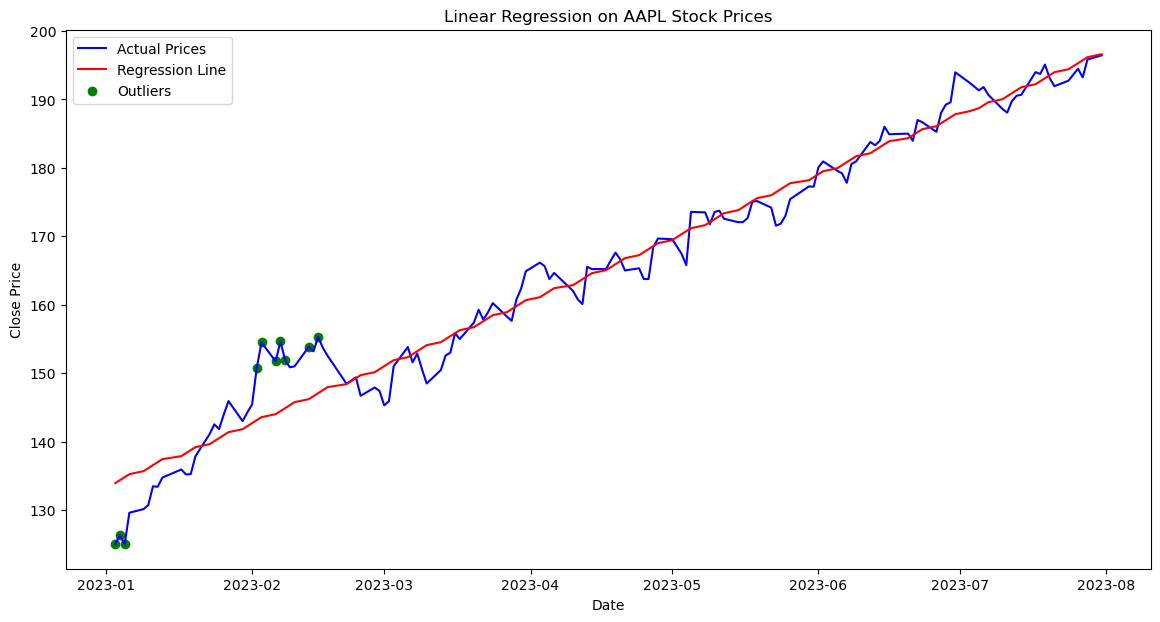

In [6]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, y, label='Actual Prices', color='blue')
plt.plot(data.index, y_pred, label='Regression Line', color='red')
plt.scatter(data.index[outliers], y[outliers], color='green', marker='o', label='Outliers')
plt.title(f'Linear Regression on {ticker} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [7]:
# Print model statistics
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Coefficient: 0.44
Intercept: 133.94
